# Example Vertical Stencil

This demonstrates a simple vertical sweep combined with an offset in the horizontal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gt4py
from gt4py import gtscript

## Initialize the domain and storages

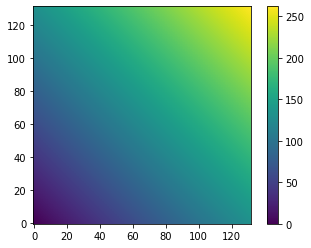

In [2]:
backend = "numpy"
nz = 64
nx, ny = 128, 128
nhalo = 2

domain= (nx, ny, nz)
shape = (nx + 2*nhalo, ny + 2*nhalo, nz)

func = lambda i, j, k: i + j + k

u_data = np.fromfunction(func, shape, dtype=float).astype(float)

u = gt4py.storage.from_array(
    data=u_data, backend=backend, default_origin=(nhalo, nhalo, 0), shape=shape
)
plt.imshow(u.data[:,:,0], origin='lower')
plt.colorbar()

In [3]:
@gtscript.function
def maybe_horiz_avg(field):
    if field > 0:
        out = field[0, 0, 0] + field[1, 0, 0] + field[-1, 0, 0] + field[0, 1, 0] + field[0, -1, 0]
    else:
        out = field[0, 0, 0]
    return out

@gtscript.stencil(backend=backend)
def vertical_avgsum(u: gtscript.Field[float], fac: float):
    with computation(FORWARD):
        with interval(0, 1):
            temp = maybe_horiz_avg(u)
        with interval(1, None):
            temp = temp[0, 0, -1] + fac * maybe_horiz_avg(u)
    with computation(BACKWARD):
        with interval(-1, None):
            u = maybe_horiz_avg(temp)
        with interval(0, -1):
            u = fac * u[0, 0, 1]

In [4]:
vertical_avgsum(u, -1.1)

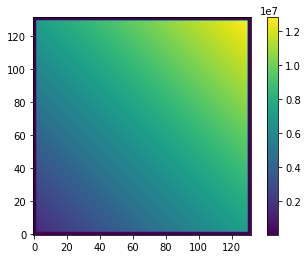

In [5]:
plt.imshow(u.data[:,:,12], origin='lower')
plt.colorbar()